In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches


# Введение. Информация о датасете

Этот набор данных представляет собой информацию о 20000 пациентах с раком лёгких и без, о поле возрасте и клинической картине заболевания.

Рак лёгких остаётся одной из самых распространённых и смертельных форм рака во всём мире, создавая серьёзные трудности для ранней диагностики и эффективного лечения.


Информация о датасете на ресурсе Kaggle: ```https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset/data```

Ссылка на датасет на Google Диск: ```https://drive.google.com/file/d/1zmNAMYzerjdrCZs51MmoWiHfvog-xdi3/view?usp=sharing```

**Атрибуты набора данных:**

Возраст (AGE): указан возраст на момент постановки диагноза.

Пол (GENDER): указана информация о поле пациента, содержит значения F (женский пол) и M (мужской пол).

Статус курения (SMOKING): содержится информация о том, курит ли человек (2) или нет (1).

Пожелтение пальцев (YELLOW_FINGERS): информация об наличии симптома, 1 - симптома нет, 2 - симптом есть

Тревожность (ANXIETY): информация об наличии симптома, 1 - симптома нет, 2 - симптом есть

Давление со стороны сверстников (PEER_PRESSURE): информация об наличии симптома, 1 - симптома нет, 2 - симптом есть

Наличие хронических заболеваний (CHRONIC DISEASE): информация об наличии хронических заболеваний, 1 - хронических заболеваний нет, 2 - хроническое заболевание есть

Переутомление (FATIGUE): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть,

Наличие аллергии (ALLERGY): информация о наличии аллергии, 1 - аллергии нет, 2 - аллергия есть,

Наличие свистящего звука при дыхании (WHEEZING): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть,

Употребление алкоголя (ALCOHOL CONSUMING): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть

Кашель (COUGHING): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть, 

Одышка(SHORTNESS OF BREATH): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть,

Затруднённое дыхание (SWALLOWING DIFFICULTY): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть, 

Боль в груди (CHEST PAIN): информация о наличии симптома, 1 - симптома нет, 2 - симптом есть

Рак лёгких (LUNG_CANCER): информация о наличии рака лёгких у пациента, 'YES' - опухоль есть, 'NO' - опухоли нет

**Возможные области применения данного датасета:**

Создание математической модели с целью предсказания появления рака лёгких в зависимости от наличия симптомов у пациента.

Проведение статистического анализа с целью выявить возможные факторы риска при развитии рака лёгких.

# Загрузка данных

In [33]:
file_id = "1zmNAMYzerjdrCZs51MmoWiHfvog-xdi3" 
file_url = f"https://drive.google.com/uc?id={file_id}"

In [34]:
df_lung = pd.read_csv(file_url)
df_lung.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,2,1,1,2,1,2,1,1,2,2,2,1,1,YES
1,M,71,2,2,1,1,2,1,2,2,1,1,2,2,1,YES
2,M,61,2,1,1,2,2,1,2,2,1,1,2,2,2,NO
3,M,55,2,2,1,2,1,1,1,2,2,1,2,2,2,YES
4,F,56,2,1,1,1,1,2,2,2,2,1,2,2,2,YES
5,F,53,2,2,2,2,2,1,2,1,1,2,2,2,2,NO
6,F,54,2,2,2,2,1,2,1,2,2,1,2,1,1,YES
7,M,69,1,2,1,2,2,2,2,1,1,1,2,1,1,YES
8,F,63,2,2,1,1,2,1,1,2,2,2,2,1,1,YES
9,M,60,1,1,2,2,2,2,2,2,2,2,2,1,2,YES


# Исследовательский анализ данных. Проверка полноты и уникальности данных

In [35]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 20000 non-null  object
 1   AGE                    20000 non-null  int64 
 2   SMOKING                20000 non-null  int64 
 3   YELLOW_FINGERS         20000 non-null  int64 
 4   ANXIETY                20000 non-null  int64 
 5   PEER_PRESSURE          20000 non-null  int64 
 6   CHRONIC DISEASE        20000 non-null  int64 
 7   FATIGUE                20000 non-null  int64 
 8   ALLERGY                20000 non-null  int64 
 9   WHEEZING               20000 non-null  int64 
 10  ALCOHOL CONSUMING      20000 non-null  int64 
 11  COUGHING               20000 non-null  int64 
 12  SHORTNESS OF BREATH    20000 non-null  int64 
 13  SWALLOWING DIFFICULTY  20000 non-null  int64 
 14  CHEST PAIN             20000 non-null  int64 
 15  LUNG_CANCER        

In [36]:
df_lung.shape

(20000, 16)

В датасете 20000 строк и 16 столбцов.

В датасете в каждой колонке 20000 непустых значений, то есть пропусков нет.

In [37]:
df_lung.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

В названиях некоторых столбцов есть лишние пробелы в начале или конце, написаны буквами в верхнем регистре и в названиях есть пробелы между словами, которые лучше заменить на нижнее подчёркивание: '_'. Поэтому в последующем лучше изменить написание на нижний регистр, удалить пробелы в начале и конце названия и заменить пробелы между словами на нижнее подчёркивание.

In [38]:
columns = df_lung.columns
for column in columns:
    print(df_lung[column].value_counts())

GENDER
M    10576
F     9424
Name: count, dtype: int64
AGE
62    1014
60     961
63     948
61     943
59     926
64     914
65     896
58     870
66     862
67     798
57     789
68     766
56     735
69     706
55     660
54     584
70     579
71     546
53     539
72     480
52     471
73     419
51     364
74     349
50     312
75     294
49     258
76     243
48     207
77     198
78     176
47     171
46     140
79     123
45     121
80      89
44      82
43      65
81      60
82      54
42      47
87      34
83      33
40      29
84      28
41      27
85      22
39      18
38      13
86      13
37       6
36       6
35       4
31       2
34       2
33       2
32       1
30       1
Name: count, dtype: int64
SMOKING
2    11234
1     8766
Name: count, dtype: int64
YELLOW_FINGERS
2    11404
1     8596
Name: count, dtype: int64
ANXIETY
2    10073
1     9927
Name: count, dtype: int64
PEER_PRESSURE
2    10053
1     9947
Name: count, dtype: int64
CHRONIC DISEASE
2    10190
1     9810
Na

Стоит отметить, что истинно числовые признаки в датасете представлены в составе одного столбца - AGE, остальные данные представлены, скорее, категориальными данными, где 1 - это отсутствие характеристики у пациента, а 2 - её наличие, также есть столбец с полом пациентов, где F - это женский пол, а M - мужской.

Значения в колонке LUNG_CANCER стоит заменить на 0 (отсутствие) и 1 (наличие), так как категориальные данные нейросети или модели машинного обучения на вход не берут и будут выдавать ошибку. Аналогичную процедуру нужно провести и для колонки GENDER: 1 - мужской пол, 0 - женский пол.

Подтвердим предположение о том, что в датасете нет пропущенных значений:

**Оценка полноты датасета:**

In [39]:
df_lung.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Действительно, по всем колонкам нет пропусков

In [40]:
completeness = 1 - df_lung.isnull().sum().sum() / len(df_lung)
print(f'Полнота датасета: {completeness}')

Полнота датасета: 1.0


Полнота датасета: 1.0

**Оценка уникальности записей датасета:**

In [41]:
print(df_lung.duplicated().sum())

429


В датасете есть 429 полных дубликатов, их при последующей модификации датасета нужно удалить.

In [42]:
uniqueness = 1 - df_lung.duplicated().sum() / len(df_lung)
print(f'Уникальность записей датасета: {uniqueness}')

Уникальность записей датасета: 0.97855


Уникальность записей датасета: 0.97855

# Исследовательский анализ данных. Просмотр распределения признаков и их зависимостей

Посмотрим на распределение возраста пациентов:

In [43]:
df_lung['AGE'].describe()

count    20000.00000
mean        62.20280
std          8.20622
min         30.00000
25%         57.00000
50%         62.00000
75%         68.00000
max         87.00000
Name: AGE, dtype: float64

Среднее значение возраста: 62 года, в данном датасете предтавлены пациенты возрастом от 30 до 87 лет

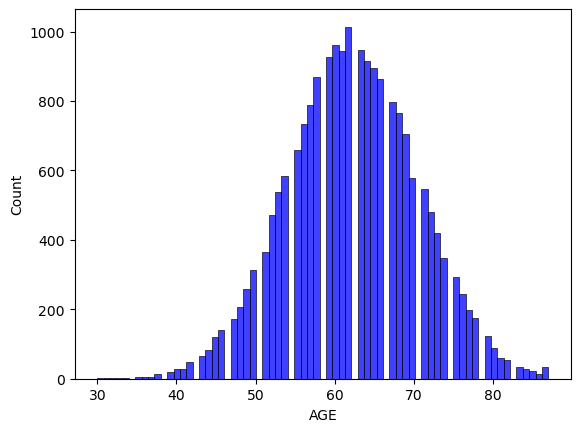

In [44]:
sns.histplot(df_lung['AGE'], color='blue')
plt.show()

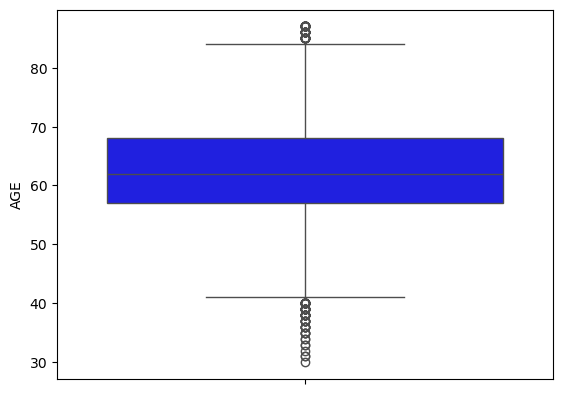

In [45]:
sns.boxplot(df_lung['AGE'], color='blue')
plt.show()

По боксплоту видно, что пациенты возрастом моложе 40 лет считаются выбросами, но удалять эти выбросы при последующей обработке данных не стоит.

In [46]:
category_column = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

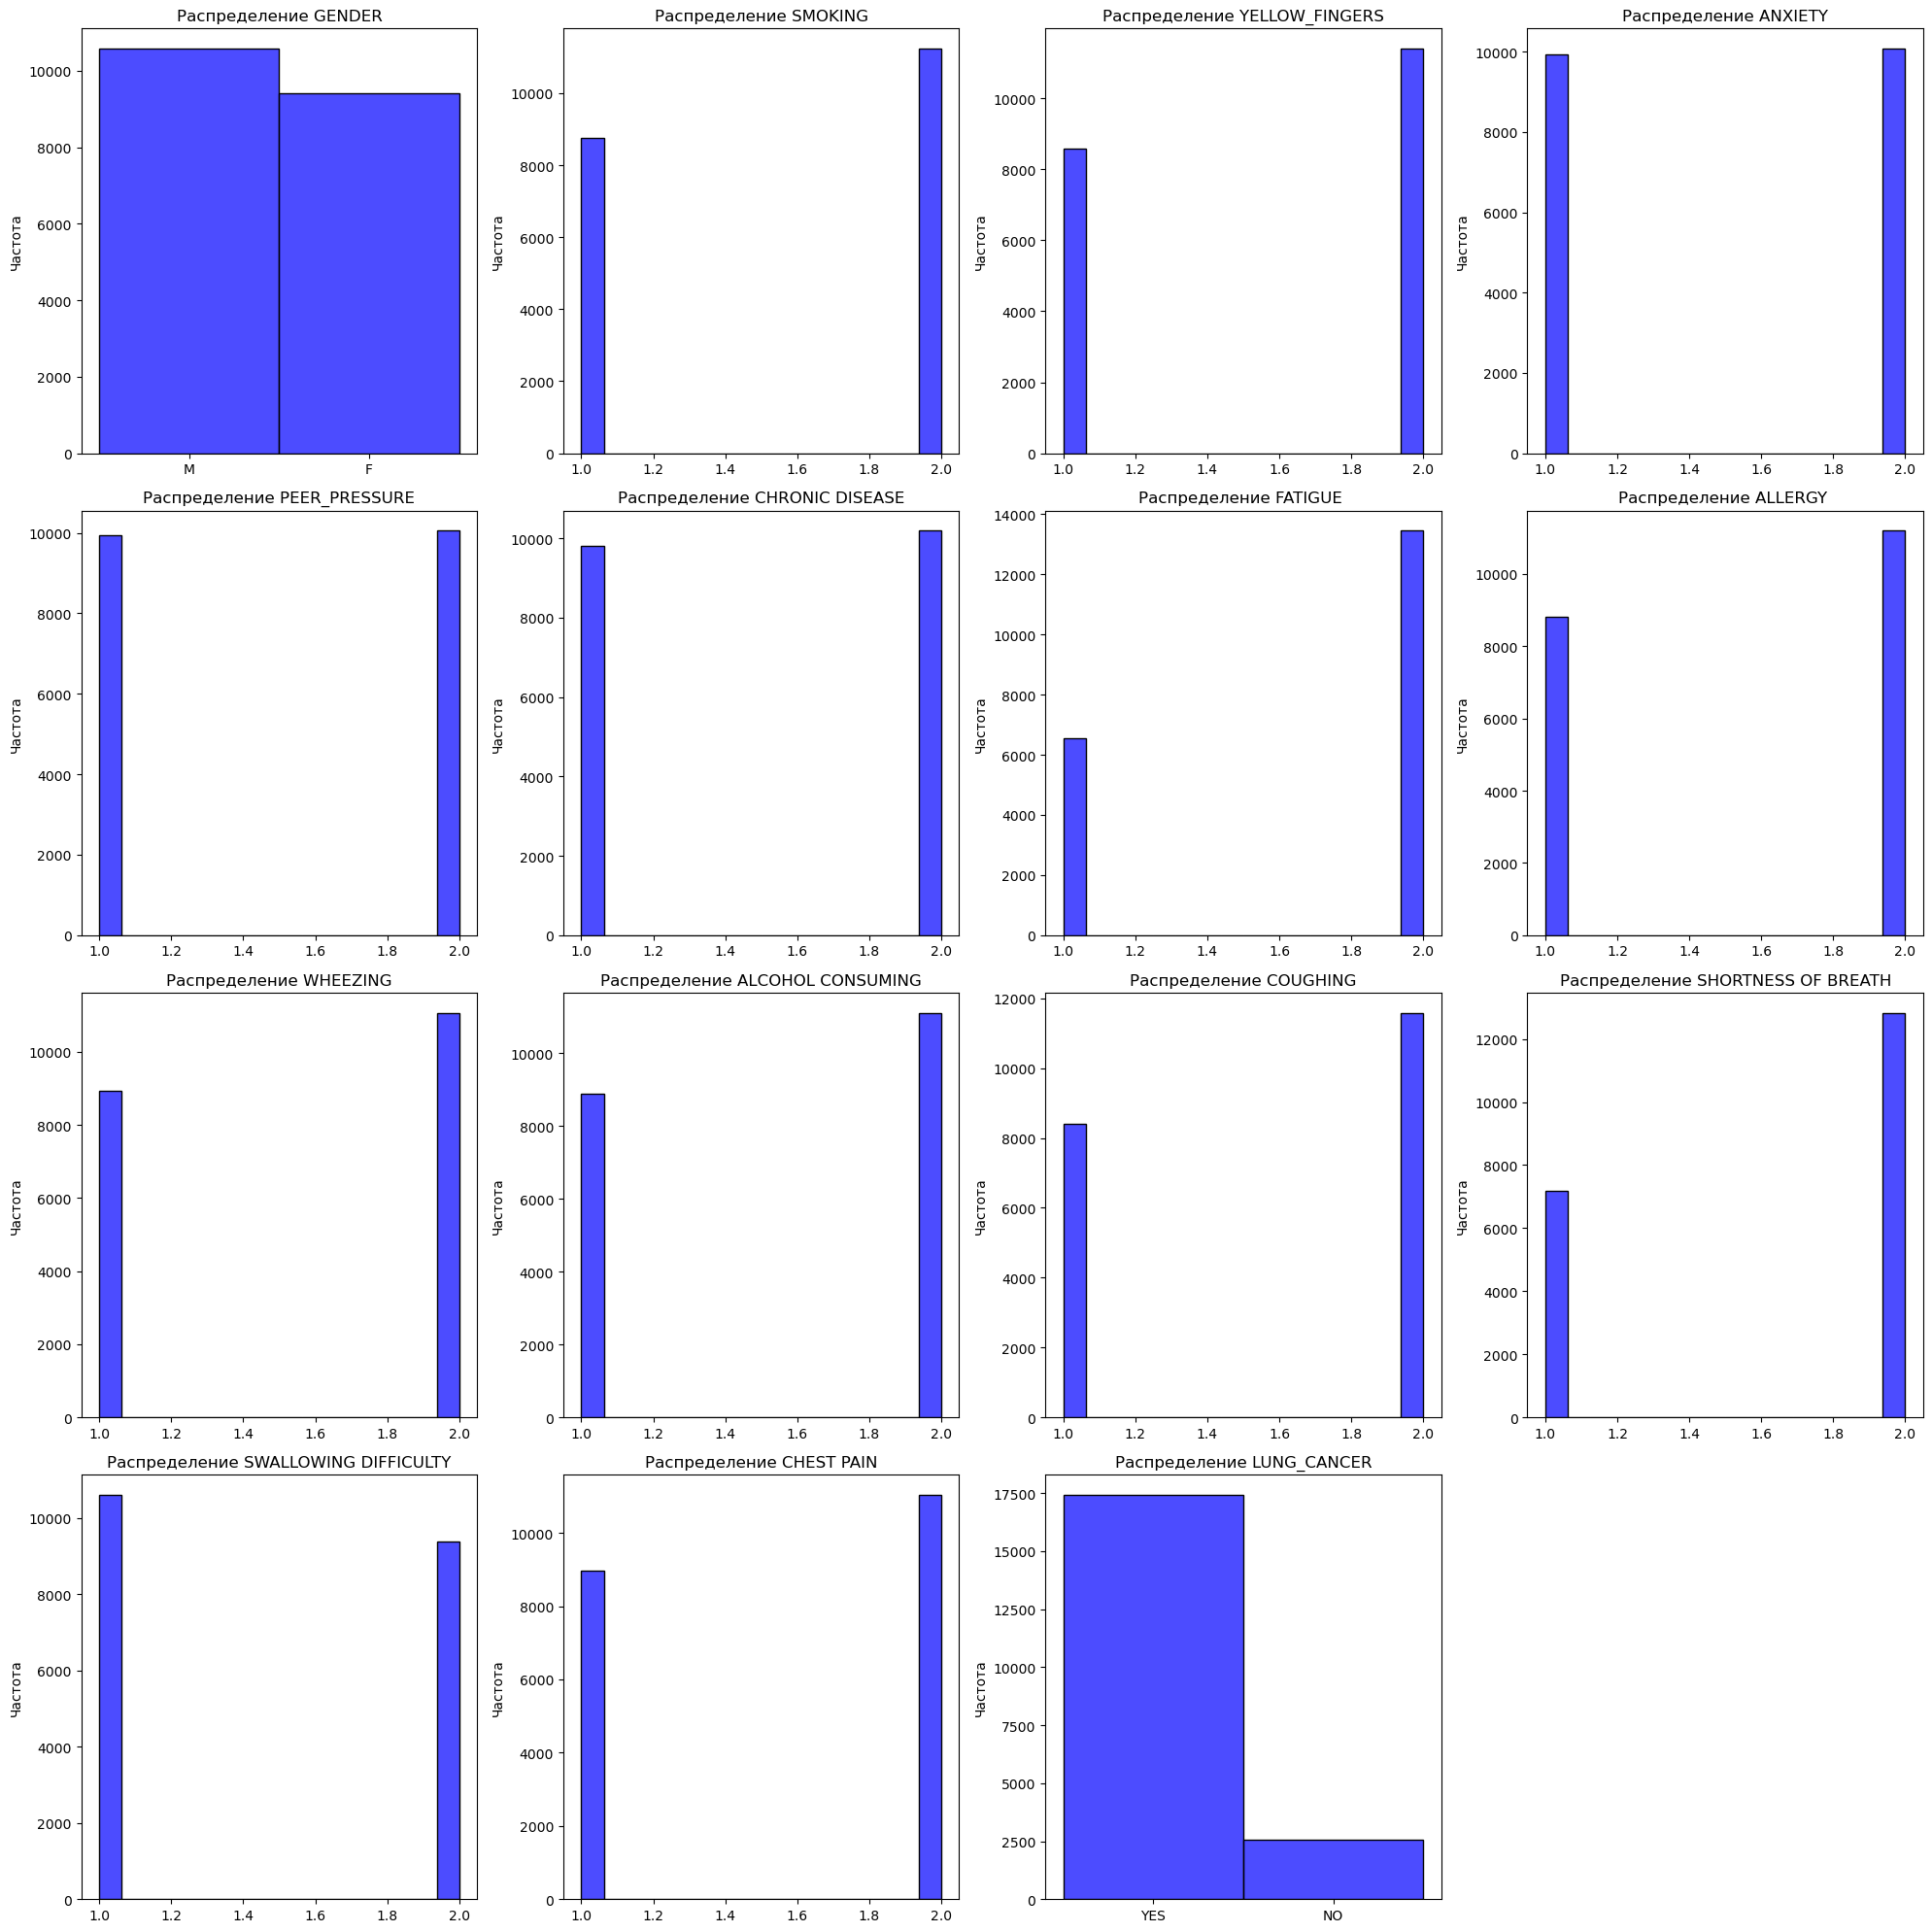

In [47]:
n_features = len(category_column)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, column in enumerate(category_column):
    sns.histplot(df_lung[column], ax=axes[i], color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Распределение {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Частота')

# Скрываем пустые subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

По целевой переменной LUNG_CANCER наблюдается сильный дисбаланс классов, скорее всего, при подготовке датасетов для обучения моделей стоит учитывать дисбаланс и делать разделение стратифицированным.

Остальные признаки находятся в балансе, кроме одышки и тревожности.

In [48]:
category_column_LC = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

In [49]:
unique_dict = {col: df_lung[col].unique().tolist() for col in category_column}
unique_dict

{'GENDER': ['M', 'F'],
 'SMOKING': [2, 1],
 'YELLOW_FINGERS': [1, 2],
 'ANXIETY': [1, 2],
 'PEER_PRESSURE': [2, 1],
 'CHRONIC DISEASE': [1, 2],
 'FATIGUE ': [2, 1],
 'ALLERGY ': [1, 2],
 'WHEEZING': [1, 2],
 'ALCOHOL CONSUMING': [2, 1],
 'COUGHING': [2, 1],
 'SHORTNESS OF BREATH': [2, 1],
 'SWALLOWING DIFFICULTY': [1, 2],
 'CHEST PAIN': [1, 2],
 'LUNG_CANCER': ['YES', 'NO']}

Посмотрим на категориальные признаки относительно целевой переменной LUNG_CANCER:

C:\Users\Eliza\AppData\Local\Temp\ipykernel_22836\428352662.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Eliza\AppData\Local\Temp\ipykernel_22836\428352662.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Eliza\AppData\Local\Temp\ipykernel_22836\428352662.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Eliza\AppData\Local\Temp\ipykernel_22836\428352662.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Eliza\AppData\Local\Temp\ipykernel_22836\428352662.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Eliza\

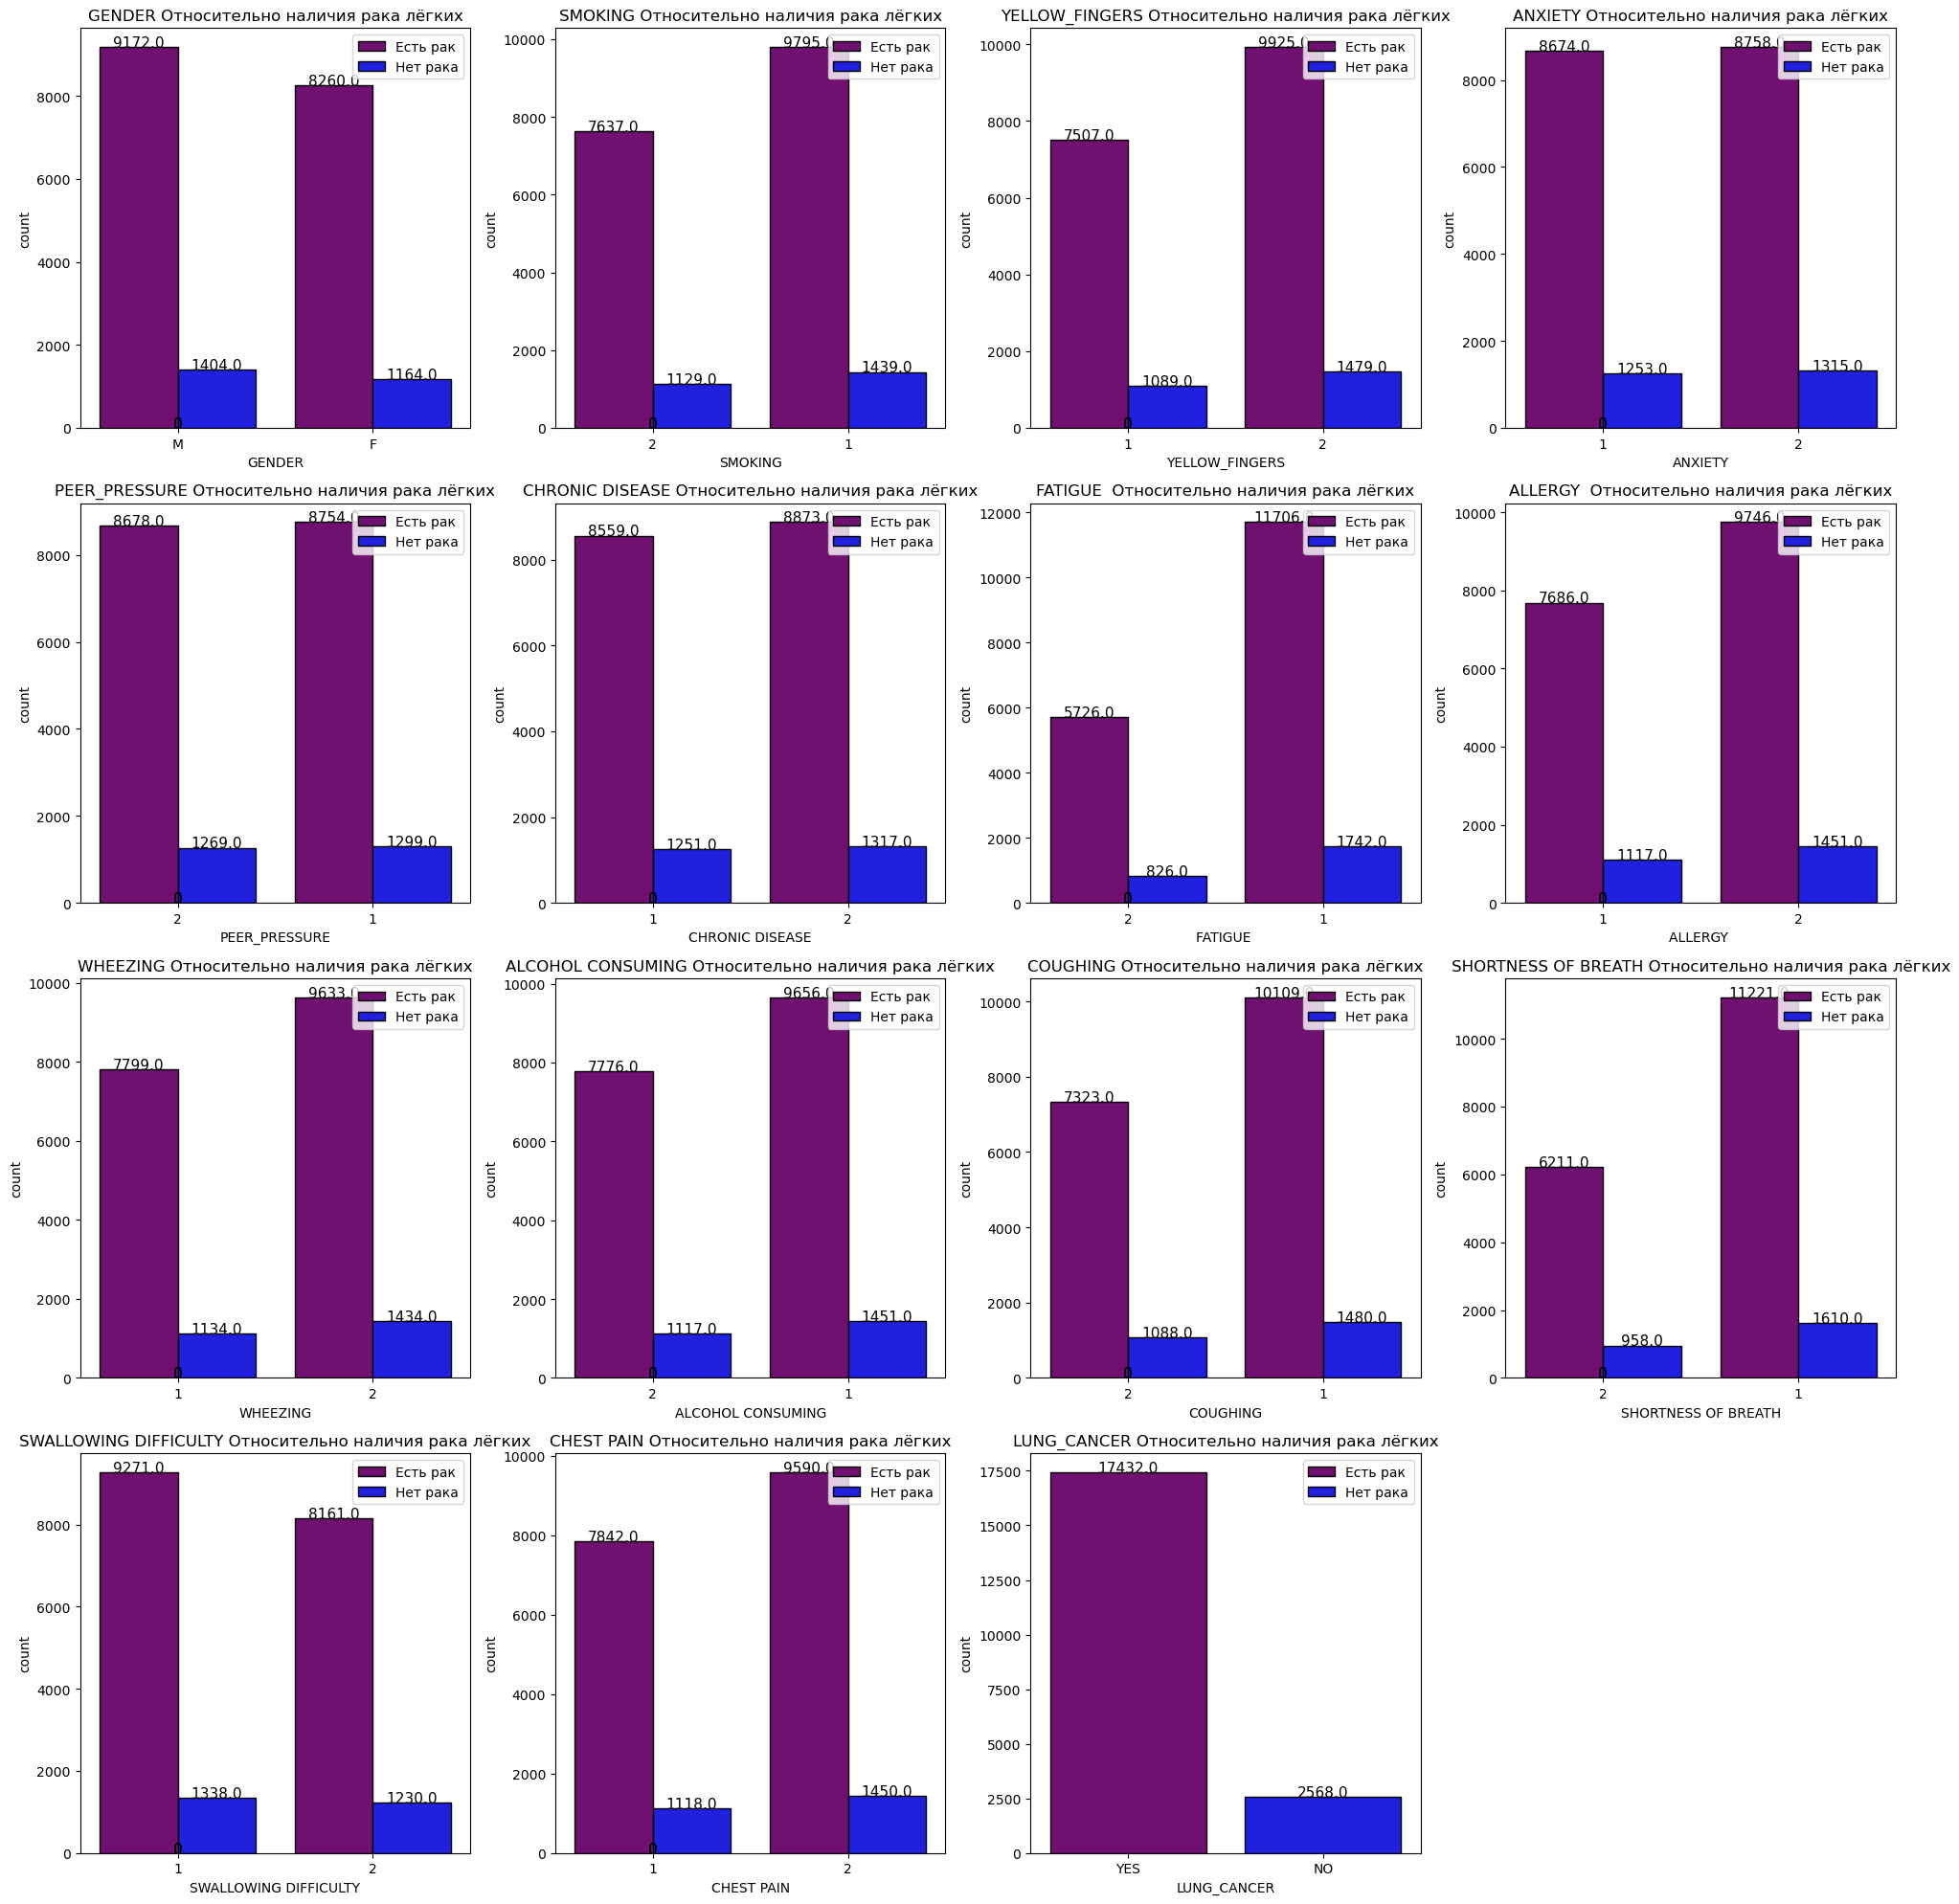

In [50]:
n_features = len(category_column)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

# Определяем кастомную палитру
custom_palette = {'YES': 'purple', 'NO': 'blue'}

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sns.countplot(
        data=df_lung,
        x=category_column[i],
        hue="LUNG_CANCER",
        edgecolor="black",
        palette=custom_palette  # Применяем нашу палитру
    )
    
    # Добавляем подписи значений на столбцы
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height(),
            horizontalalignment="center",
            fontsize=11,
        )
    
    ax.set_xticklabels(unique_dict[category_column[i]])
    plt.legend(["Есть рак", "Нет рака"], loc="upper right")
    title = category_column[i] + " Относительно наличия рака лёгких"
    plt.title(title)

for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Также необходимо посмотреть, есть ли у рака лёгких зависимость от возраста.

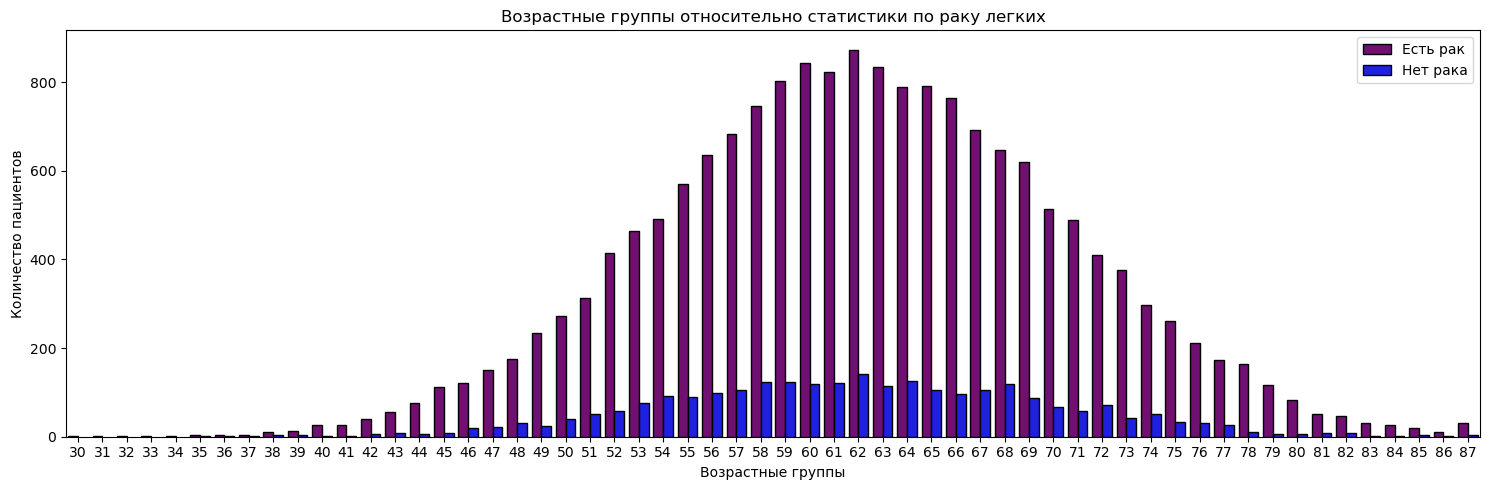

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

plt.subplot(1, 1, 1)
ax = sns.countplot(
    data=df_lung,
    x='AGE',
    hue="LUNG_CANCER",
    edgecolor="black",
    palette={'YES': 'purple', 'NO': 'blue'}
) 
plt.legend(["Есть рак", "Нет рака"], loc="upper right") 
title = "Возрастные группы относительно статистики по раку легких"
plt.title(title)
plt.xlabel("Возрастные группы")
plt.ylabel("Количество пациентов")
plt.tight_layout()
plt.show()

График выглядит достаточно нагружено, поэтому сделаем аналогичный, но уже с разделением на возрастные группы 0-30, 31-40, 41-50, 51-60 и 71 и далее.

In [52]:
# Создаем возрастные группы для лучшей визуализации
df_lung['AGE_GROUP'] = pd.cut(df_lung['AGE'], 
                             bins=[0, 30, 40, 50, 60, 70, 100],
                             labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])

fig = px.histogram(df_lung, x='AGE_GROUP', color='LUNG_CANCER',
                   title='Возрастные группы относительно статистики по раку легких',
                   labels={'AGE_GROUP': 'Возрастные группы', 'count': 'Количество пациентов'},
                   color_discrete_map={'YES': 'purple', 'NO': "blue"},
                   barmode='group',
                   text_auto=False)

fig.update_layout(
    xaxis_title='Возрастные группы',
    yaxis_title='Количество пациентов',
    legend_title='Диагноз',
    font=dict(size=12)
)

fig.show()
fig.write_html("plot_lung_cancer.html", include_plotlyjs=True)

Видно, что основная часть пациентов с раком лёгких имеет возраст от 40 до 80 лет. 

Пик заболеваемости - это возраст 60-70 лет

In [53]:
from scipy.stats import chi2_contingency

In [54]:
category_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
                   'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                   'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                   'SWALLOWING DIFFICULTY', 'CHEST PAIN']
df_analysis = df_lung[(df_lung['AGE'] >= 40) & (df_lung['AGE'] <= 80)].copy()

print("СТАТАНАЛИЗ ПРИЗНАКОВ")
for column in category_columns:
    table = pd.crosstab(df_analysis[column], df_analysis['LUNG_CANCER'])
    if table.size >= 4:
        p_value = chi2_contingency(table)[1]
        significance = "Есть статистическая значимость" if p_value < 0.05 else "Нет статистической значимости"
        
        print(f"\n{column}: p={p_value:.4f} {significance}")
        for value in table.index: # вывод процентов пациентов и таблицы сопряжённости
            total = table.loc[value].sum()
            cancer_rate = table.loc[value, 'YES'] / total
            print(f"  {value}: {cancer_rate:.1%}")
            print(table)

СТАТАНАЛИЗ ПРИЗНАКОВ

GENDER: p=0.0707 Нет статистической значимости
  F: 87.6%
LUNG_CANCER    NO   YES
GENDER                 
F            1147  8122
M            1382  9050
  M: 86.8%
LUNG_CANCER    NO   YES
GENDER                 
F            1147  8122
M            1382  9050

SMOKING: p=0.8930 Нет статистической значимости
  1: 87.1%
LUNG_CANCER    NO   YES
SMOKING                
1            1113  7529
2            1416  9643
  2: 87.2%
LUNG_CANCER    NO   YES
SMOKING                
1            1113  7529
2            1416  9643

YELLOW_FINGERS: p=0.5283 Нет статистической значимости
  1: 87.3%
LUNG_CANCER       NO   YES
YELLOW_FINGERS            
1               1072  7397
2               1457  9775
  2: 87.0%
LUNG_CANCER       NO   YES
YELLOW_FINGERS            
1               1072  7397
2               1457  9775

ANXIETY: p=0.3686 Нет статистической значимости
  1: 87.4%
LUNG_CANCER    NO   YES
ANXIETY                
1            1235  8554
2            1294  8618
  2:

Для анализа были выбраны люди возрастом от 40 до 80 лет. По графикам можно предположить, что наличие рака лёгких у пациента слабо зависит от наличия одного какого-то признака, так как видимое различие обусловлено низким количеством здоровых пациентов в датасете.

Непосредственно статистические тесты подтвердили данную гипотезу: каждый категориальный признак в отдельности для пациентов в возрасте от 40 до 80 лет не определяет наличие рака лёгких.

**Вывод 1**

По результатам проведённого EDA-анализа получены оценки полноты (1.0) и уникальности (0.97855) датасета.

Найдено 429 дубликатов, которые при последующем анализе стоит удалить.

Также необходимо приведение названий колонок к единому стилю и нижнему регистру, типы данных для колонок с бинарными значениями нужно привести к типу bool.

В более углубленном анализе признаков стоит уделить внимание комбинациям нескольких признаков у пациентов, так как признаки по отдельности не показали статистической значимости.

# Приведение названий колонок к общему стилю и приведение типов

Приводим названия колонок к общему стилю

In [55]:
columns = df_lung.columns
dict_rename = {}
for col in columns:
    dict_rename[col] = col.lower().rstrip().replace(' ', '_')
df_lung.rename(columns=dict_rename, inplace=True)
df_lung.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer', 'age_group'],
      dtype='object')

Замена значений в колонках с двумя значениями и приведение типов

In [56]:
column_age_lung = [
    'smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 
    'chronic_disease', 'fatigue', 'allergy', 'wheezing', 
    'alcohol_consuming', 'coughing', 'shortness_of_breath',
    'swallowing_difficulty', 'chest_pain'
    ]
for column in column_age_lung:    
    df_lung[column] = df_lung[column].map({2: True, 1: False}).astype(bool)
print(df_lung.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 20000 non-null  object  
 1   age                    20000 non-null  int64   
 2   smoking                20000 non-null  bool    
 3   yellow_fingers         20000 non-null  bool    
 4   anxiety                20000 non-null  bool    
 5   peer_pressure          20000 non-null  bool    
 6   chronic_disease        20000 non-null  bool    
 7   fatigue                20000 non-null  bool    
 8   allergy                20000 non-null  bool    
 9   wheezing               20000 non-null  bool    
 10  alcohol_consuming      20000 non-null  bool    
 11  coughing               20000 non-null  bool    
 12  shortness_of_breath    20000 non-null  bool    
 13  swallowing_difficulty  20000 non-null  bool    
 14  chest_pain             20000 non-null 

In [57]:
# Замена значений в столбце lung_cancer с YES и NO на True и False. 
# И замена значений в gender с M и F на 1 и 0 соотвественно.
df_lung['lung_cancer'] = df_lung['lung_cancer'].map(
    {'YES': True, 'NO': False}
    ).astype(bool)
df_lung['gender'] = df_lung['gender'].map({'M': True, 'F': False}).astype('bool')
print(df_lung.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 20000 non-null  bool    
 1   age                    20000 non-null  int64   
 2   smoking                20000 non-null  bool    
 3   yellow_fingers         20000 non-null  bool    
 4   anxiety                20000 non-null  bool    
 5   peer_pressure          20000 non-null  bool    
 6   chronic_disease        20000 non-null  bool    
 7   fatigue                20000 non-null  bool    
 8   allergy                20000 non-null  bool    
 9   wheezing               20000 non-null  bool    
 10  alcohol_consuming      20000 non-null  bool    
 11  coughing               20000 non-null  bool    
 12  shortness_of_breath    20000 non-null  bool    
 13  swallowing_difficulty  20000 non-null  bool    
 14  chest_pain             20000 non-null 

# Анализ влияния комбинаций признаков

Поскольку категориальные признаки по отдельности не давали занчимых различий на графиках, стоит попробовать комбинации признаков.

In [58]:
def analyze_combination(feature1, feature2):
    combo = df_lung.groupby([feature1, feature2])['lung_cancer'].agg(['count']).reset_index()
    combo['combination'] = combo[feature1].astype(str) + ' & ' + combo[feature2].astype(str)
    combo_filtered = combo[
        ((combo[feature1] == False) & (combo[feature2] == False)) | 
        ((combo[feature1] == True) & (combo[feature2] == True))
    ]
    combo_filtered = combo_filtered.sort_values(by=[feature1]) # чтобы фильтровать значения бинарных столбцов
    
    return combo_filtered


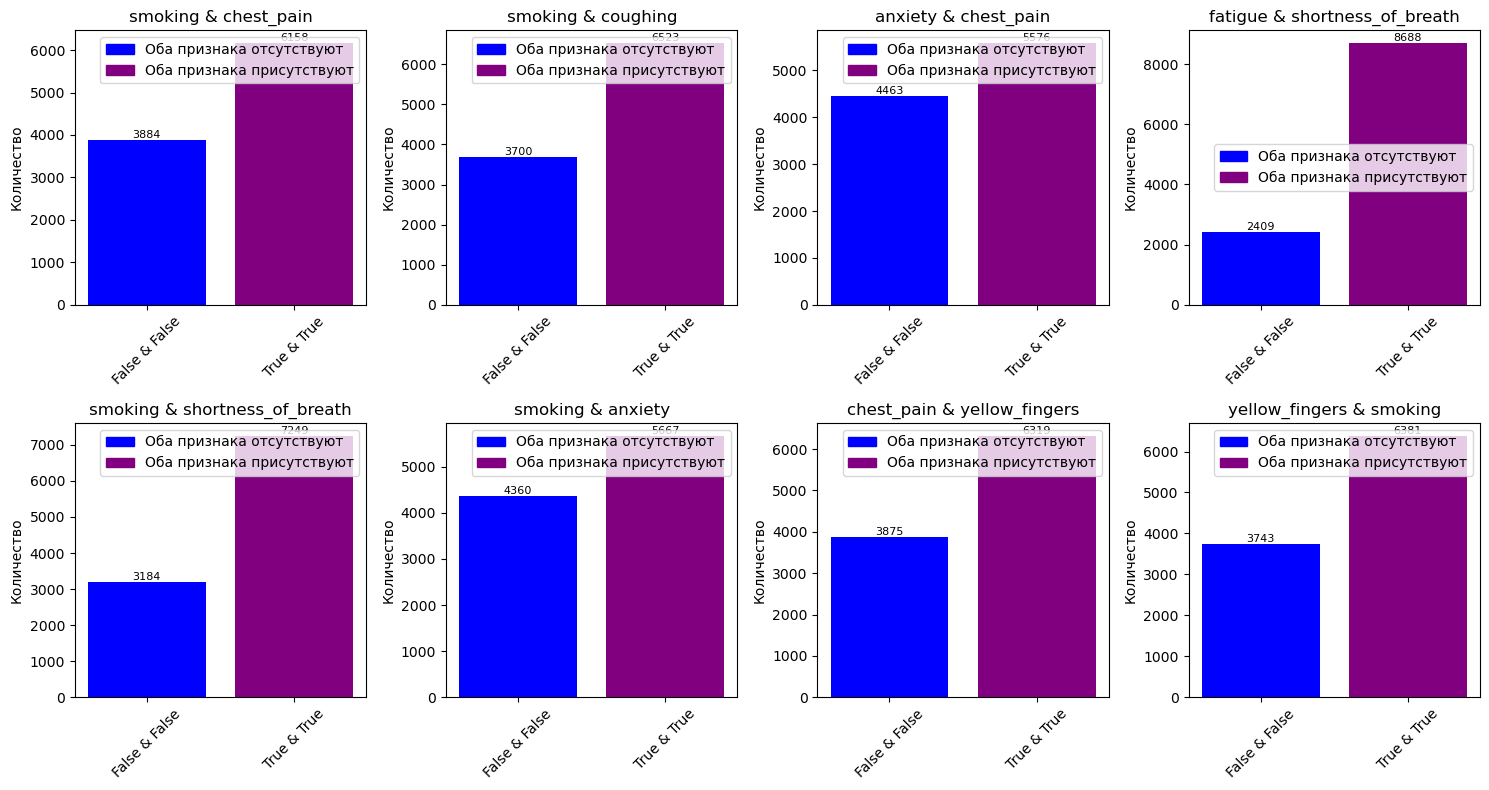

In [59]:
def plot_combinations(combinations_list):
    n_combinations = len(combinations_list)  # вычисление размера сетки графиков
    n_cols = min(4, n_combinations)
    n_rows = (n_combinations + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    
    if n_combinations == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    blue_patch = mpatches.Patch(color='blue', label='Оба признака отсутствуют')
    purple_patch = mpatches.Patch(color='purple', label='Оба признака присутствуют') # пишем легенду
    
    for i, (feat1, feat2) in enumerate(combinations_list):
        if i >= len(axes):
            break
            
        combo_data = analyze_combination(feat1, feat2)
        filtered_data = combo_data[
            (combo_data['combination'] == 'False & False') | 
            (combo_data['combination'] == 'True & True')
        ]
        
        filtered_data = filtered_data.sort_values(by='combination')
        
        # Создаем список цветов
        colors = []
        for combo_str in filtered_data['combination']:
            if combo_str == 'False & False':
                colors.append('blue')
            elif combo_str == 'True & True':
                colors.append('purple')
        
        bars = axes[i].bar(filtered_data['combination'], filtered_data['count'], color=colors)
        axes[i].set_title(f'{feat1} & {feat2}')
        axes[i].set_ylabel('Количество')
        axes[i].tick_params(axis='x', rotation=45)
        
        axes[i].legend(handles=[blue_patch, purple_patch], loc='best')
        
        for bar, count in zip(bars, filtered_data['count']):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height}', 
                        ha='center', va='bottom', fontsize=8)

    for j in range(i + 1, len(axes)): # если комбинаций больше, чем ячеек, убрать лишние ячейки
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

combinations = [
    ('smoking', 'chest_pain'),
    ('smoking', 'coughing'),
    ('anxiety', 'chest_pain'),
    ('fatigue', 'shortness_of_breath'),
    ('smoking', 'shortness_of_breath'),
    ('smoking', 'anxiety'),
    ('chest_pain', 'yellow_fingers'),
    ('yellow_fingers', 'smoking')
]
plot_combinations(combinations)

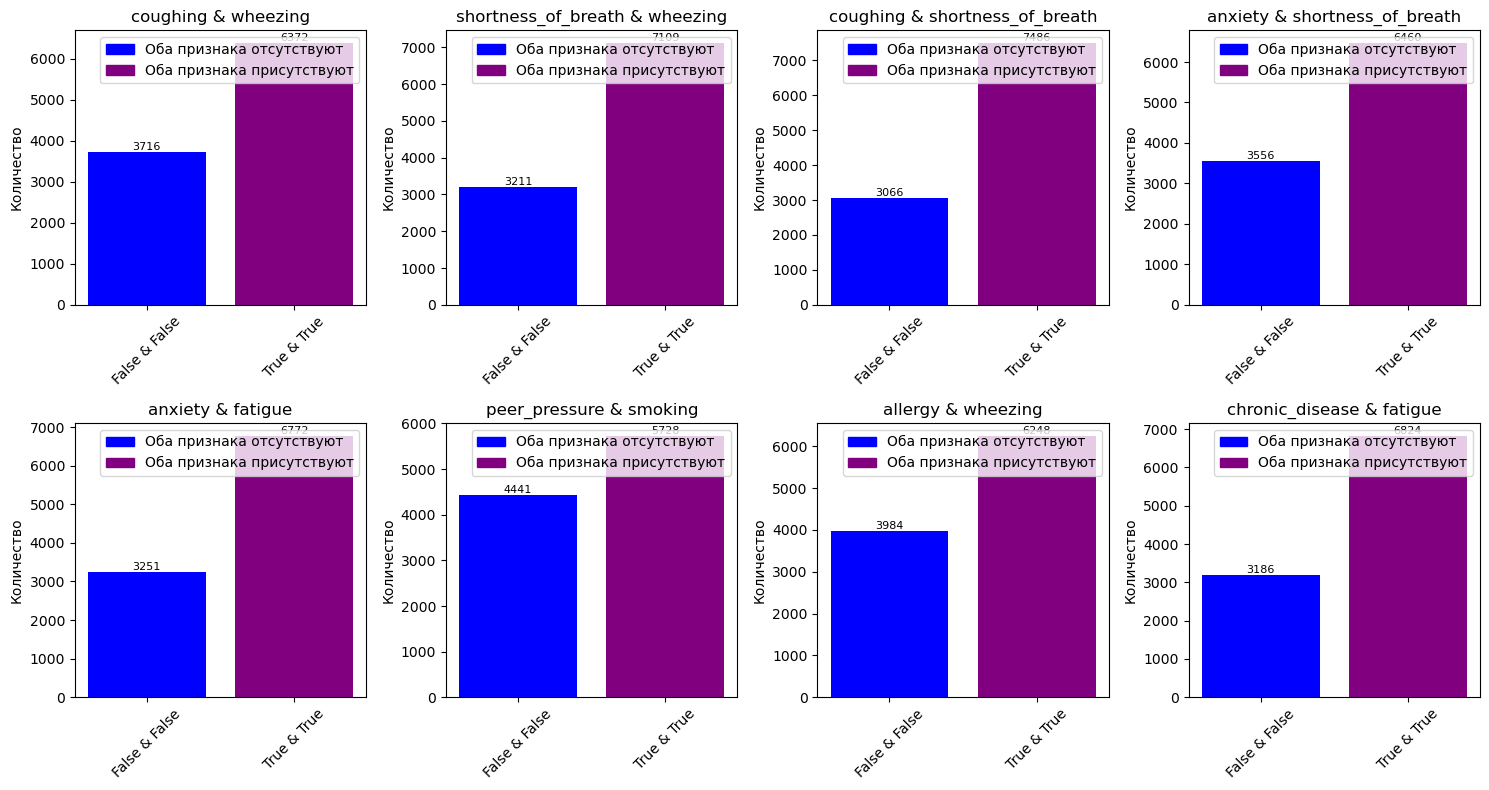

In [60]:
combinations = [    
    ('coughing', 'wheezing'),                 
    ('shortness_of_breath', 'wheezing'),      
    ('coughing', 'shortness_of_breath'),      
    ('anxiety', 'shortness_of_breath'),       
    ('anxiety', 'fatigue'),                  
    ('peer_pressure', 'smoking'),             
    ('allergy', 'wheezing'),                 
    ('chronic_disease', 'fatigue'),
]
plot_combinations(combinations)

**Вывод 2**

Таким образом, для последующего анализа можно использовать комбинации: одышка и свистящий звук при дыхании, курение и одышка, курение и боль в груди, курение и кашель, боль в груди и жёлтые пальцы, жёлтые пальцы и курение. Тревожность и переутомление, переутомление и одышка вряд ли могут являться признаками именно рака дёгких, как мы видели выше, основной пик заболеваемости - это люди старше 60 лет, для их возраста характерно переутомление, усталость, аналогичное можно предположить и для наличия хронических заболеваний - это просто возрастная особенность.

Это и подтверждают графики ниже:

Распределение переутомления по возрастным категориям

In [61]:
df_lung['AGE_GROUP'] = pd.cut(df_lung['age'], 
                             bins=[0, 30, 40, 50, 60, 70, 100],
                             labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])

fig = px.histogram(df_lung, x='AGE_GROUP', color='fatigue',
                   title='Возрастные группы относительно статистики по наличию переутоиления',
                   labels={'AGE_GROUP': 'Возрастные группы', 'count': 'Количество пациентов'},
                   color_discrete_map={True: 'purple', False: "blue"},
                   barmode='group',
                   text_auto=False)

fig.update_layout(
    xaxis_title='Возрастные группы',
    yaxis_title='Количество пациентов',
    legend_title='Диагноз',
    font=dict(size=12)
)

fig.show()
fig.write_html("plot_fatigue.html", include_plotlyjs=True)

Распределение наличия хронических заболеваний по возрастным категориям

In [62]:
df_lung['AGE_GROUP'] = pd.cut(df_lung['age'], 
                             bins=[0, 30, 40, 50, 60, 70, 100],
                             labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71+'])

fig = px.histogram(df_lung, x='AGE_GROUP', color='chronic_disease',
                   title='Возрастные группы относительно статистики по наличию хронических заболеваний',
                   labels={'AGE_GROUP': 'Возрастные группы', 'count': 'Количество пациентов'},
                   color_discrete_map={True: 'purple', False: "blue"},
                   barmode='group',
                   text_auto=False)

fig.update_layout(
    xaxis_title='Возрастные группы',
    yaxis_title='Количество пациентов',
    legend_title='Диагноз',
    font=dict(size=12)
)
fig.write_html("plot_chronic_disease.html", include_plotlyjs=True)
fig.show()